In [32]:
%matplotlib inline
import torch
import random
from d2l import torch as d2l

features: tensor([ 0.6860, -0.7350]) 
label: tensor([8.0791])


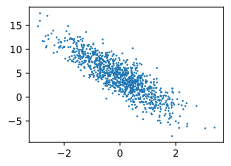

In [33]:

'''
1.生成数据集
数据集特性：
(1).2个特征,1000个样本 (每个样本包含从标准正态分布中采样的2个特征)
(2).y=Xw+b+ϵ w=[2,−3.4]⊤ , b=4.2
    ϵ是捕获样本和标签时产生的误差,假设误差符合正态分布,均值为0,标准差为0.01

'''

def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1 ,(num_examples,len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, torch.reshape(y, (-1,1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2

features, labels = synthetic_data(true_w, true_b, 1000)

print('features:', features[0],'\nlabel:', labels[0])

d2l.set_figsize()
d2l.plt.scatter(d2l.numpy(features[:, 1]), d2l.numpy(labels), 1);

In [34]:
'''
2.读取数据集
'''
def data_iter(batch_size, features, labels):






SyntaxError: unexpected EOF while parsing (1578982895.py, line 9)